In [40]:
from functions import *
from read_from_file_df import *
import pickle

In [38]:
def to_show(board,size):
    table = np.zeros((size, size, 3))
    for i in range(size):
        for j in range(size):
            color = int(board[size * i + j]) * -1 + 1
            table[i, j] = [color, color, color]
    return table

In [3]:
df = read_file_to_df(PATH_TO_READ, SIZE)

In [33]:
prev_board = df.iloc[19]
board_to_predict = df.iloc[20]

In [34]:
print(prev_board.values)
print(board_to_predict.values)

[0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0]
[0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0]


C:\Users\דרור\AppData\Local\Temp\ipykernel_25516\4000052614.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = int(board[size * i + j]) * -1 + 1


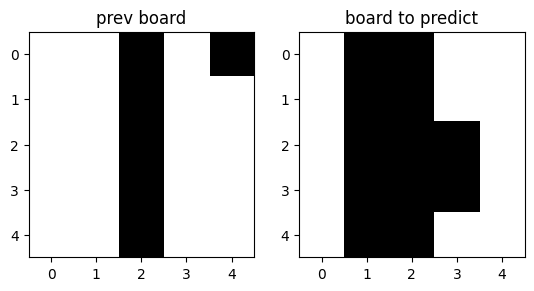

In [39]:
prev = to_show(prev_board,SIZE)
predict = to_show(board_to_predict,SIZE)
fig, axes = plt.subplots(1, 2)

# Plot the first image
axes[0].imshow(prev)
axes[0].set_title('prev board')

# Plot the second image
axes[1].imshow(predict)
axes[1].set_title('board to predict')

# Show the images
plt.show()

In [53]:
a = prev_board.to_frame().T
new_columns = [f'Col_{i}' for i in range(1, 25 + 1)]
a.columns = new_columns

In [54]:
with open('decision_tree_df_model_pixel_18.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
loaded_model.predict(a)

array([1])

In [55]:
for i in range(SIZE*SIZE): # to any pixel in the expected board
    name_file = f"decision_tree_df_model_pixel_{str(i+1)}.pkl"
    with open(name_file, 'rb') as file:
        loaded_model = pickle.load(file)
    b = loaded_model.predict(a)
    print(b)

[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[0]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[1]
[0]
[0]
[1]
[1]
[0]
[0]


In [ ]:
amount_features = len(df_sort.columns) - SIZE*SIZE #the previous boards
features = df_sort.iloc[:, :amount_features]
for i in range(SIZE*SIZE): # to any pixel in the expected board
    name_col = 'Col_' + str(i+amount_features + 1)
    target = df_sort[name_col]
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=613)
    dt, node_count, max_depth, train_test_full_error  = dec_tree_df(X_train,y_train, X_test, y_test, 20, 42)
    name_file = f"decision_tree_df_model_pixel_{str(i+1)}.pkl"
    with open(name_file, 'wb') as file:
        pickle.dump(dt, file)
    print(i)
    print(node_count, max_depth)
    print(train_test_full_error)

In [ ]:
for i in range(SIZE*SIZE): # to any pixel in the expected board

In [5]:
df

,"(0,0)","(0,1)","(0,2)","(0,3)","(0,4)","(1,0)","(1,1)","(1,2)","(1,3)","(1,4)",...,"(3,0)","(3,1)","(3,2)","(3,3)","(3,4)","(4,0)","(4,1)","(4,2)","(4,3)","(4,4)"
0,1,1,1,1,0,0,0,1,1,0,...,1,0,1,1,0,1,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
2,1,1,0,0,1,1,1,0,0,0,...,1,1,0,0,1,1,1,0,0,0
3,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,1,0,0,0,1,1,0,0,...,0,1,1,1,0,0,1,1,0,0
5,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,1,1,0,0,0,1,1,0,0,0,...,1,1,0,0,1,1,1,0,0,0
7,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
8,0,1,1,0,0,0,1,1,0,0,...,0,1,1,1,0,0,1,1,0,0
9,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
